In [1]:
import pygmt
import pandas as pd
import numpy as np
import scipy
from scipy.spatial import cKDTree
from matplotlib.path import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import xarray as xr
import verde as vd
# For projecting data
import pyproj
# For fetching sample datasets
#import ensaio
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LogNorm, PowerNorm
#import dask

In [2]:
'''
#path_to_data_file = ensaio.fetch_alps_gps(version=1)
#print(path_to_data_file)
#path_to_data_file = "/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/Ind_RF.csv" ## For Ubuntu
path_to_data_file = r"D:\Amitava_Laptop\Geodynamics-Project-IISERP\India_Tibet\Global_crust.csv" ## For windos OR use '\\' instead of '\'#data_eq_raw = pd.read_csv(path_to_data_file, comment='#', sep=r'\s+')
)
data_eq_raw = pd.read_csv(path_to_data_file, comment='#') # data_eq_raw = pd.read_csv(path_to_data_file, comment='#', delimiter=',')  ## No delimeter is defaulted as comma


########################
## Read the file to find the header line
#with open(path_to_data_file, 'r') as f:
#    for line in f:
#        if line.startswith('#'):
#            header = line.strip('#').strip().split()  # Remove '#' and split into column names
#            break
########################

# Convert Moho_km to numeric, forcing non-numeric values to NaN
data_eq_raw["Moho_km"] = pd.to_numeric(data_eq_raw["Moho_km"], errors="coerce")

# Drop rows with NaN values in Moho_km
data_eq_all = data_eq_raw.dropna(subset=["Moho_km"])

# df = df.reset_index(drop=True) # To reset index
data_eq_all = data_eq_all.reset_index(drop=True)


# Filter data based on longitude and latitude
data_eq_ind = data_eq_all[
    (data_eq_all["Long"] >= 65) & (data_eq_all["Long"] <= 110) & 
    (data_eq_all["Lat"] >= 5) & (data_eq_all["Lat"] <= 45)
].reset_index(drop=True)

#data_eq = data_eq_all

# Display the data

#eq_info = data_eq
data_eq_all
#data_eq.to_csv("eq_data.csv", index=False)
'''

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\DELL\AppData\Local\Temp\ipykernel_14668\4195396016.py:1: SyntaxWarning: invalid escape sequence '\A'
  '''


'\n#path_to_data_file = ensaio.fetch_alps_gps(version=1)\n#print(path_to_data_file)\n#path_to_data_file = "/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/Ind_RF.csv" ## For Ubuntu\npath_to_data_file = r"D:\\Amitava_Laptop\\Geodynamics-Project-IISERP\\India_Tibet\\Global_crust.csv" ## For windos OR use \'\\\' instead of \'\'#data_eq_raw = pd.read_csv(path_to_data_file, comment=\'#\', sep=r\'\\s+\')\n)\ndata_eq_raw = pd.read_csv(path_to_data_file, comment=\'#\') # data_eq_raw = pd.read_csv(path_to_data_file, comment=\'#\', delimiter=\',\')  ## No delimeter is defaulted as comma\n\n\n########################\n## Read the file to find the header line\n#with open(path_to_data_file, \'r\') as f:\n#    for line in f:\n#        if line.startswith(\'#\'):\n#            header = line.strip(\'#\').strip().split()  # Remove \'#\' and split into column names\n#            break\n########################\n\n# Convert Moho_km to numeric, forcing non-numeric values to NaN\ndata_eq_raw["

In [3]:
'''
# Check for duplicate (Lat, Long, Moho_km) groups
duplicate_mask = data_eq_all.duplicated(subset=["Lat", "Long", "Moho_km"], keep=False)

# Count duplicate entries
num_duplicates = duplicate_mask.sum()
# Count unique groups that are duplicated
num_repeated_groups = data_eq_all.loc[duplicate_mask, ["Lat", "Long", "Moho_km"]].drop_duplicates().shape[0]

print(f"Total number of repeated (Lat, Long, Moho_km) rows: {num_duplicates}")
print(f"Number of unique (Lat, Long, Moho_km) groups that are repeated: {num_repeated_groups}")

# Keep only the first occurrence of each duplicate group
data_eq = data_eq_all.drop_duplicates(subset=["Lat", "Long", "Moho_km"], keep="first")

# Reset index after dropping duplicates
data_eq = data_eq[["Lat", "Long", "Moho_km"]].reset_index(drop=True)

# Display the new DataFrame
eq_info = data_eq
data_eq
'''

'\n# Check for duplicate (Lat, Long, Moho_km) groups\nduplicate_mask = data_eq_all.duplicated(subset=["Lat", "Long", "Moho_km"], keep=False)\n\n# Count duplicate entries\nnum_duplicates = duplicate_mask.sum()\n# Count unique groups that are duplicated\nnum_repeated_groups = data_eq_all.loc[duplicate_mask, ["Lat", "Long", "Moho_km"]].drop_duplicates().shape[0]\n\nprint(f"Total number of repeated (Lat, Long, Moho_km) rows: {num_duplicates}")\nprint(f"Number of unique (Lat, Long, Moho_km) groups that are repeated: {num_repeated_groups}")\n\n# Keep only the first occurrence of each duplicate group\ndata_eq = data_eq_all.drop_duplicates(subset=["Lat", "Long", "Moho_km"], keep="first")\n\n# Reset index after dropping duplicates\ndata_eq = data_eq[["Lat", "Long", "Moho_km"]].reset_index(drop=True)\n\n# Display the new DataFrame\neq_info = data_eq\ndata_eq\n'

In [4]:
'''
# Count occurrences of each (Lat, Long, Moho_km) group
group_counts = data_eq_all.groupby(["Lat", "Long", "Moho_km"]).size()

# Filter only those that are repeated (appear more than once)
repeated_groups = group_counts[group_counts > 1]

# Print the number of unique repeated groups
print(f"Unique repeated (Lat, Long, Moho_km) groups: {len(repeated_groups)}")
'''

'\n# Count occurrences of each (Lat, Long, Moho_km) group\ngroup_counts = data_eq_all.groupby(["Lat", "Long", "Moho_km"]).size()\n\n# Filter only those that are repeated (appear more than once)\nrepeated_groups = group_counts[group_counts > 1]\n\n# Print the number of unique repeated groups\nprint(f"Unique repeated (Lat, Long, Moho_km) groups: {len(repeated_groups)}")\n'

In [5]:

#Loading only Lat, Long, Moho_km
# Define file path
#path_to_data_file = r"D:\Amitava_Laptop\Geodynamics-Project-IISERP\India_Tibet\Global_crust.csv"
path_to_data_file = r"D:\Amitava\Projects\Spline_Moho\Global_moho_compilation\Global_crust.csv"

# Load only required columns while ignoring commented lines
data_eq_raw = pd.read_csv(path_to_data_file, comment='#', usecols=["Lat", "Long", "Moho_km"])

# Convert Moho_km to numeric, forcing non-numeric values to NaN
data_eq_raw["Moho_km"] = pd.to_numeric(data_eq_raw["Moho_km"], errors="coerce")

# Drop rows with NaN values in Moho_km
data_eq_all = data_eq_raw.dropna(subset=["Moho_km"]).reset_index(drop=True)

# Filter data based on longitude and latitude
data_eq_ind = data_eq_all[
    (data_eq_all["Long"] >= 65) & (data_eq_all["Long"] <= 110) & 
    (data_eq_all["Lat"] >= 5) & (data_eq_all["Lat"] <= 45)
].reset_index(drop=True)

# Check for duplicate (Lat, Long, Moho_km) groups
duplicate_mask = data_eq_all.duplicated(subset=["Lat", "Long", "Moho_km"], keep=False)

# Count duplicate entries
num_duplicates = duplicate_mask.sum()
# Count unique groups that are duplicated
num_repeated_groups = data_eq_all.loc[duplicate_mask, ["Lat", "Long", "Moho_km"]].drop_duplicates().shape[0]

print(f"Total number of repeated (Lat, Long, Moho_km) rows: {num_duplicates}")
print(f"Number of unique (Lat, Long, Moho_km) groups that are repeated: {num_repeated_groups}")

# Keep only the first occurrence of each duplicate group
data_eq = data_eq_all.drop_duplicates(subset=["Lat", "Long", "Moho_km"], keep="first").reset_index(drop=True)

# Display the final DataFrame
eq_info = data_eq
data_eq


Total number of repeated (Lat, Long, Moho_km) rows: 2862
Number of unique (Lat, Long, Moho_km) groups that are repeated: 1375


C:\Users\DELL\AppData\Local\Temp\ipykernel_14668\820996541.py:7: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  data_eq_raw = pd.read_csv(path_to_data_file, comment='#', usecols=["Lat", "Long", "Moho_km"])


Lat    Long  Moho_km
0      36.43   94.87     49.5
1      36.43   94.87     48.0
2      36.81   92.95     49.0
3      37.02   91.74     57.0
4      32.25   91.70     74.0
...      ...     ...      ...
33854  57.18 -170.25     34.0
33855  60.14   -1.18     28.0
33856  62.07   -6.97     26.0
33857  70.99   -8.51     14.0
33858   7.27   80.70     40.0

[33859 rows x 3 columns]

In [6]:
# Count lines starting with '#'
num_commented_lines = sum(1 for line in open(path_to_data_file, 'r') if line.startswith('#'))

# Count NaN values in Moho_km
num_nans = data_eq_raw["Moho_km"].isna().sum()

print(f"Number of lines ignored due to comments: {num_commented_lines}")
print(f"Number of NaN values in Moho_km: {num_nans}")


Number of lines ignored due to comments: 39
Number of NaN values in Moho_km: 44


In [7]:
#region = [25, 110, 5, 45]
region = [-180, 180, -90, 90]  # Covers the whole world
#region = [-180, 180, -89.9, 89.9] #avoids the poles
print(region)

[-180, 180, -90, 90]


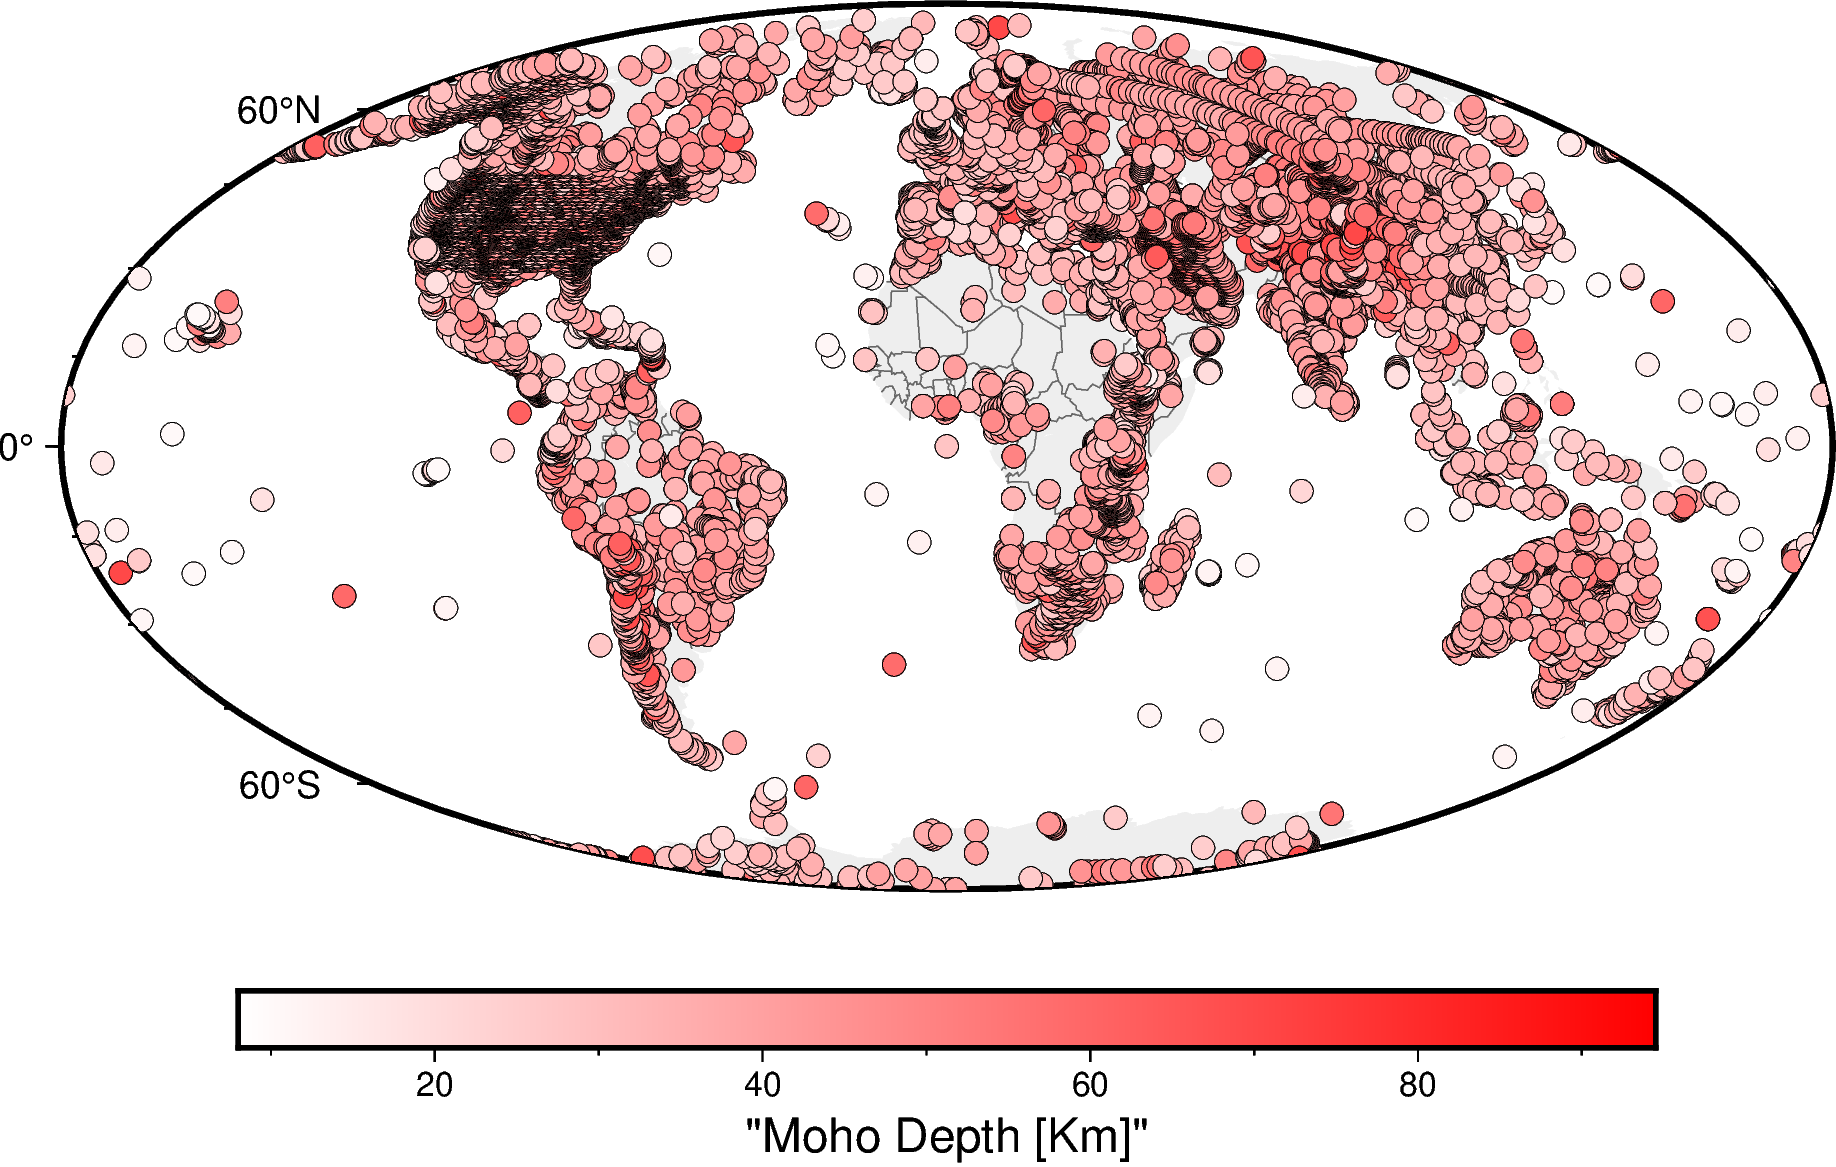

In [8]:
# Start a figure
fig = pygmt.Figure()
# Add a basemap with the data region, Mercator projection, default frame
# and ticks, color in the continents, and display national borders
fig.coast(
    region=region, projection="W15c", frame="af",
    land="#eeeeee", borders="1/#666666", area_thresh=1e4,
)
# Create a colormap for the Moho Depth
pygmt.makecpt(
    cmap="polar+h",
    series=[data_eq_all.Moho_km.min(), data_eq_all.Moho_km.max()],
    #series = [data.iloc[:, 5].min(), data.iloc[:, 5].max()],
)
# Plot colored points for the velocities
fig.plot(
    x=data_eq_all.Long,
    y=data_eq_all.Lat,
    fill=data_eq_all.Moho_km,
    style="c0.2c",
    cmap=True,
    pen="0.001p,black",
)
# Add a colorbar with automatic frame and ticks and a label
fig.colorbar(frame='af+l"Moho Depth [Km]"')
fig.show()


# Data Points on Ocean

In [9]:

# Generate a land-sea mask (0 = ocean, 1 = land)
mask = pygmt.grdlandmask(
    spacing="5m", region="g", resolution="low", maskvalues=[0, 1]
)

# Extract ocean points where mask value is 0 (ocean)
mask_values = pygmt.grdtrack(
    points=data_eq[["Long", "Lat"]],
    grid=mask,
    newcolname="mask"
)

# Filter ocean points (where mask == 0)
ocean_points = data_eq[mask_values["mask"] == 0]

# Save ocean locations to CSV
ocean_points.to_csv("ocean_locations.csv", index=False)
print("Ocean locations saved to ocean_locations.csv")


Ocean locations saved to ocean_locations.csv


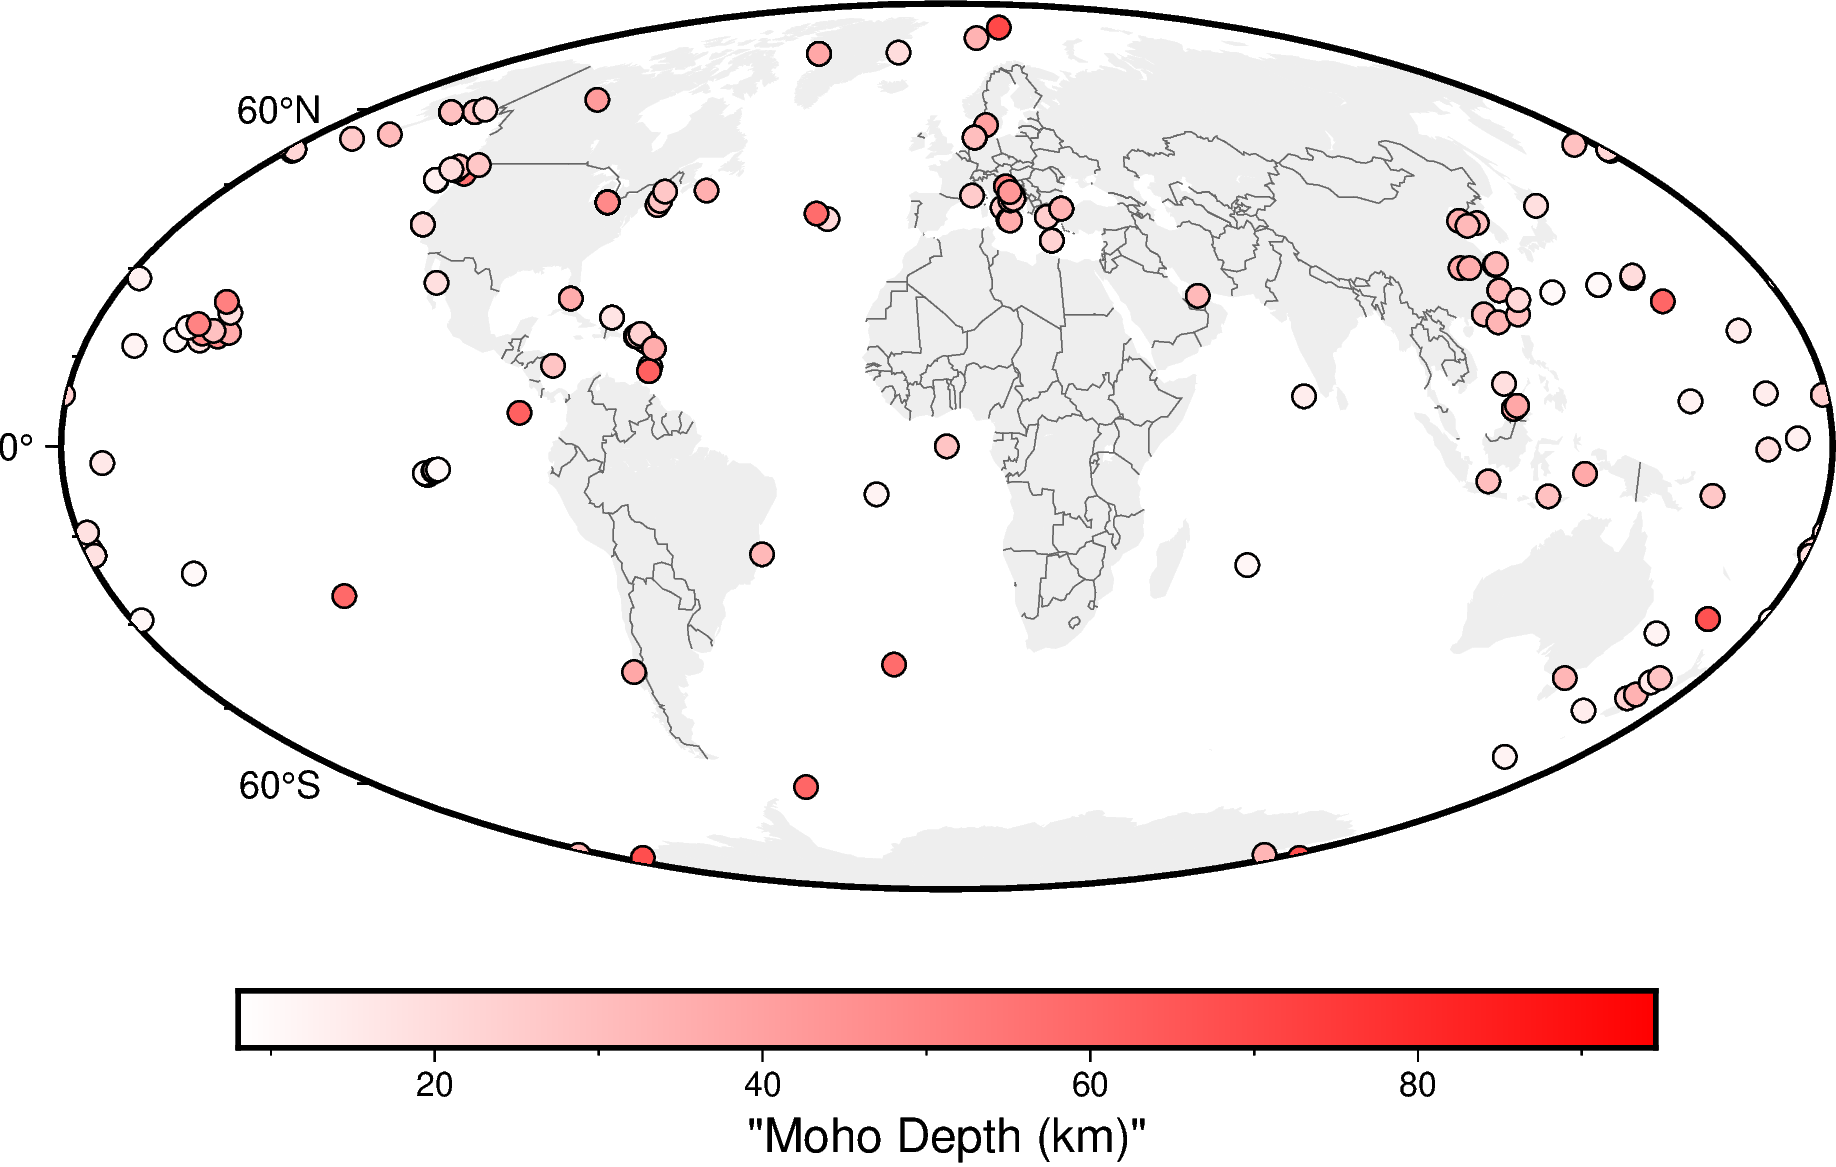

In [10]:
# Create figure
fig = pygmt.Figure()

# Define projection and region
fig.coast(
    region=region, projection="W15c", frame="af",
    land="#eeeeee", borders="1/#666666", area_thresh=1e4,
)

# Create colormap based on Moho depth
pygmt.makecpt(
    cmap="polar+h",
    series=[data_eq["Moho_km"].min(), data_eq["Moho_km"].max()],
)

# Plot Moho depth points with color scaling
fig.plot(
    x=ocean_points["Long"], 
    y=ocean_points["Lat"], 
    fill=ocean_points["Moho_km"],  # Color based on Moho depth
    style="c0.2c", 
    cmap=True, 
    pen="0.5p,black",
)

# Add a colorbar for reference
fig.colorbar(frame='af+l"Moho Depth (km)"')

# Show the plot
fig.show()


# Load Topography

## Enasio

In [11]:
#topography = pygmt.datasets ensaio.fetch_earth_topography(version=1)
#topography = "/home/amitava/Geodynamics-Project-IISERP/India_Tibet/5930767/Crustal_thickness.nc"  #for custom topography
#data_topo = xr.load_dataarray(topography)
#data_topo

## pyGMT

In [12]:
#topography =pygmt.datasets.load_earth_relief(resolution="01m", region="g")

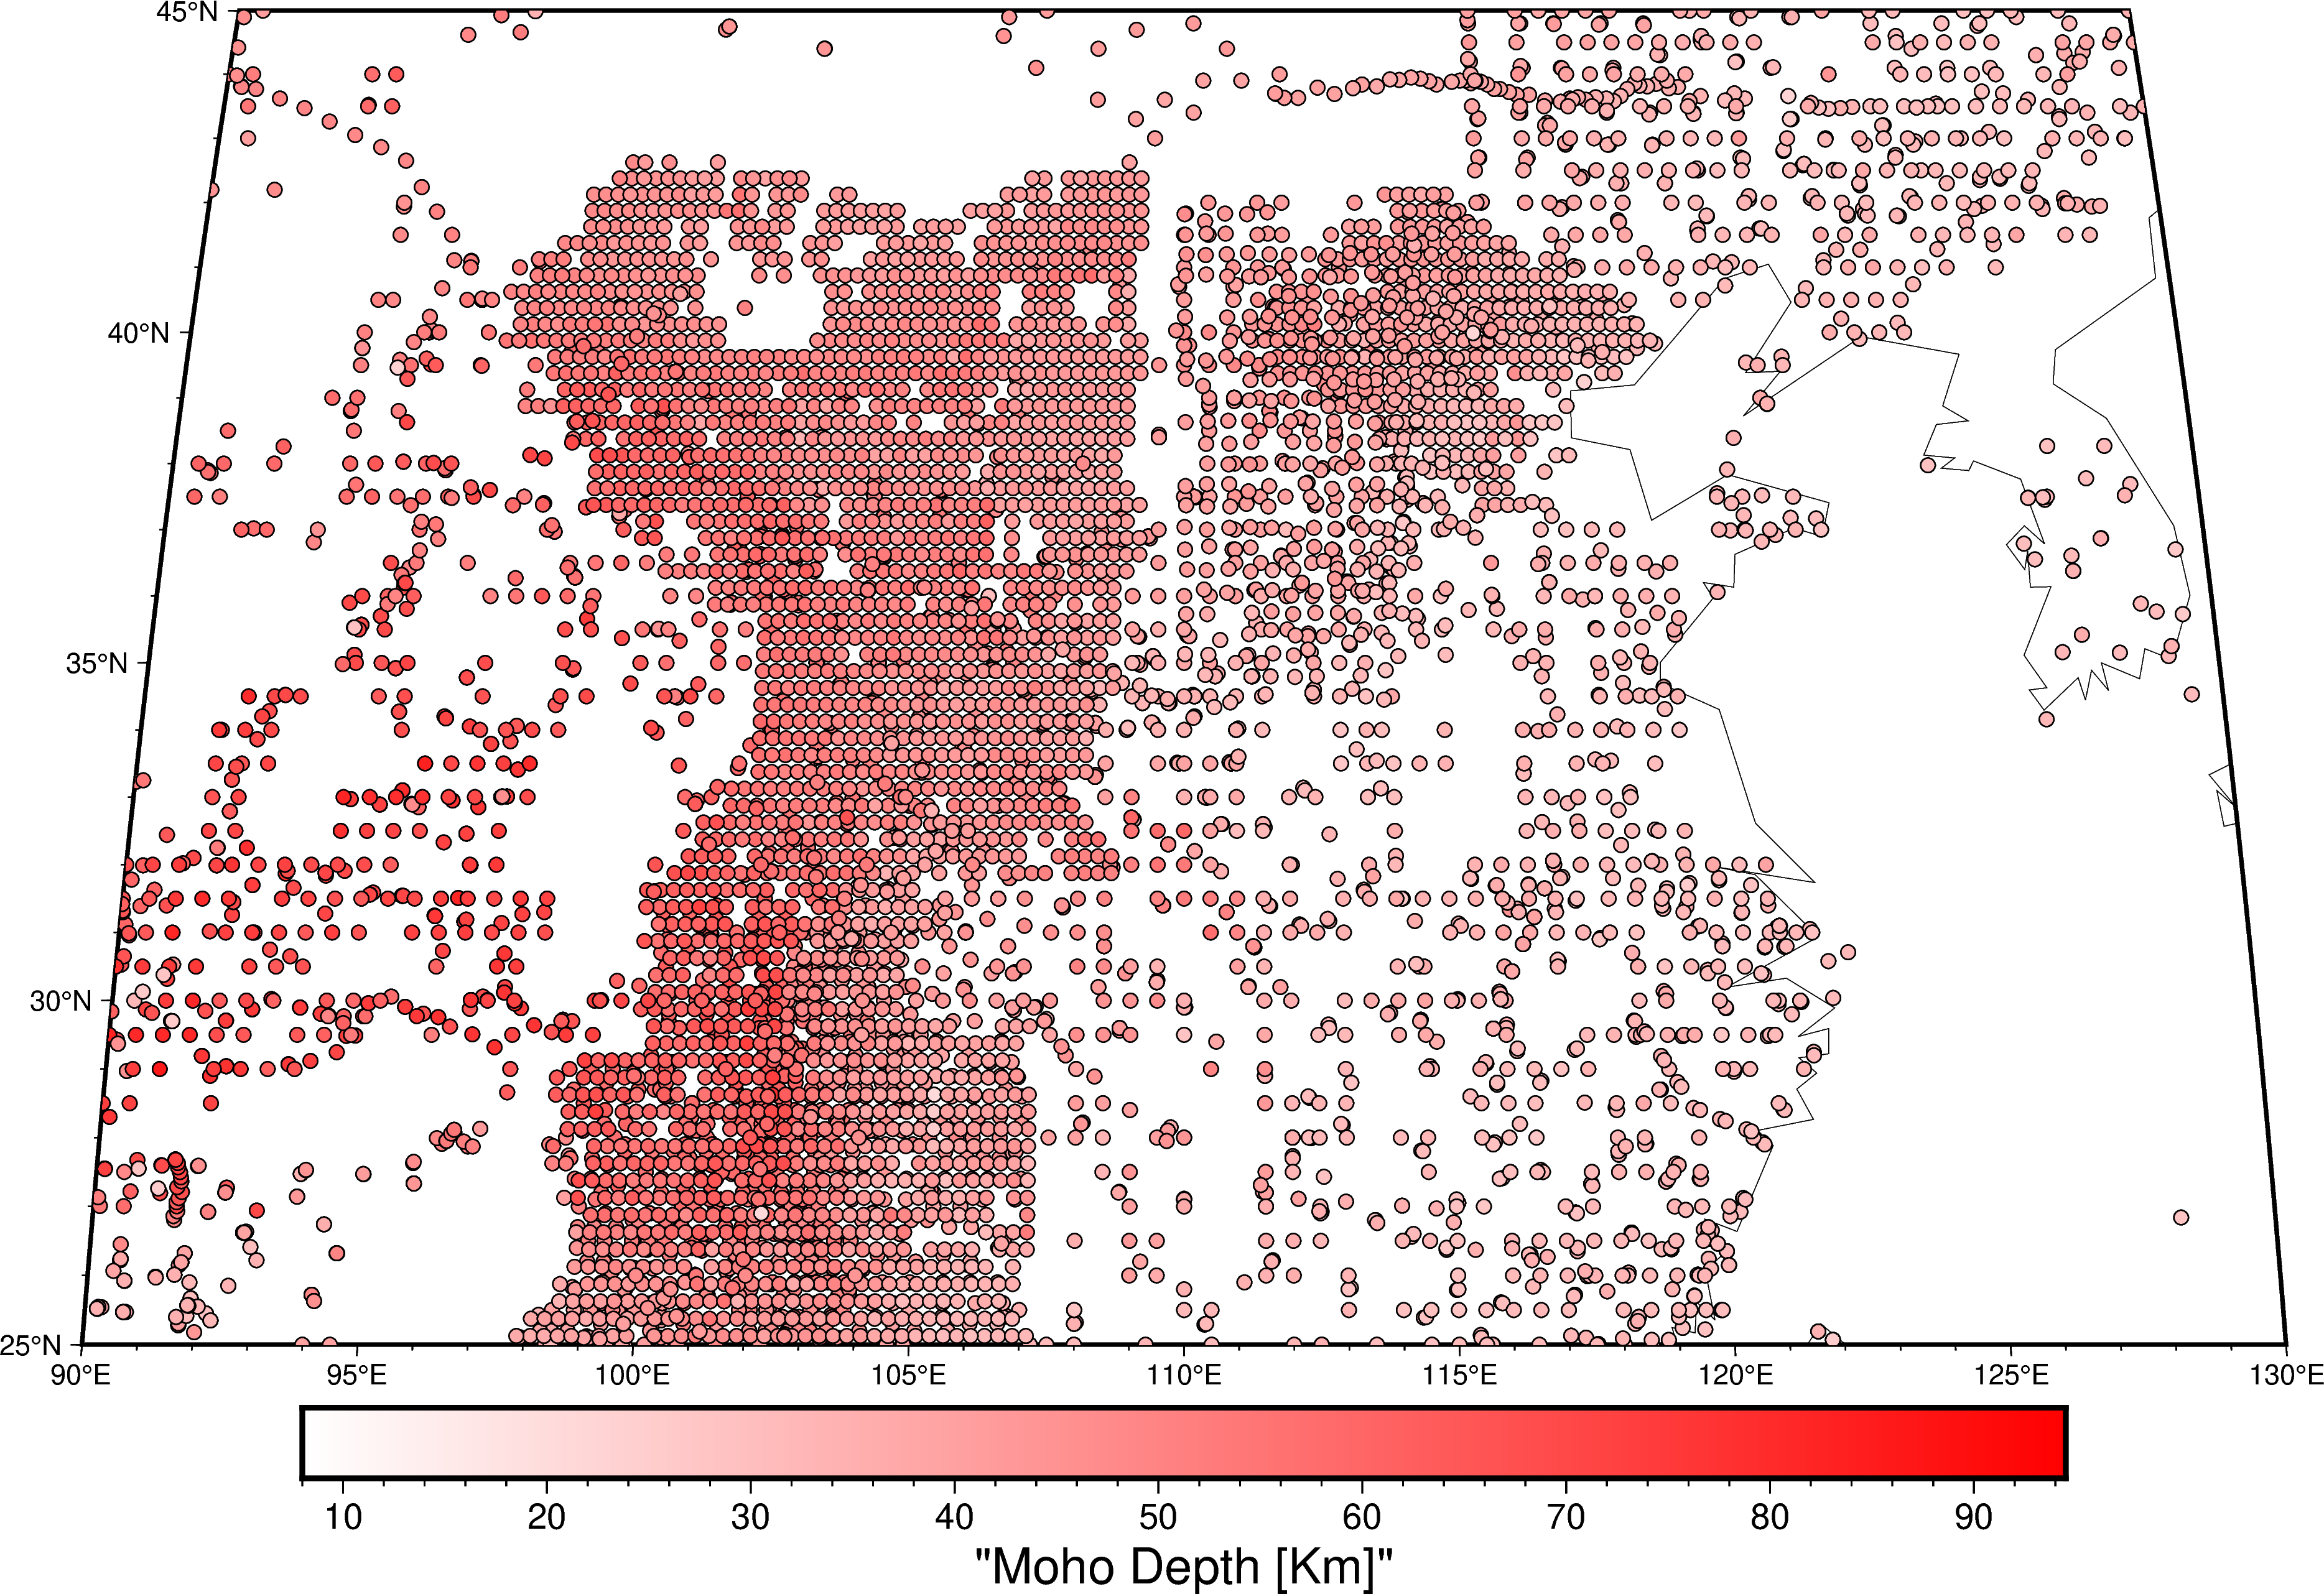

In [13]:
fig = pygmt.Figure()
fig.basemap(
    #region="g", # for the entire world
    region = [90, 130, 25, 45], #[Min Longitude, Max Longitude, Min Latitude, Max Latitude]
    projection="W30c",
    frame=True,
)
#fig.grdimage(data_topo, cmap="etopo1", shading="+nt0.5")
#fig.colorbar(frame='af+l"topography [m]"')
fig.coast(shorelines=True, resolution="c", area_thresh=1e4)
# Create a colormap for the Moho Depth
pygmt.makecpt(
    cmap="polar+h",
    series=[data_eq.Moho_km.min(), data_eq.Moho_km.max()],
    #series = [data.iloc[:, 5].min(), data.iloc[:, 5].max()],
)
# Plot colored points for the velocities
fig.plot(
    x=data_eq.Long,
    y=data_eq.Lat,
    fill=data_eq.Moho_km,
    style="c0.2c",
    cmap=True,
    pen="0.5p,black",
)
# Add a colorbar with automatic frame and ticks and a label
fig.colorbar(frame='af+l"Moho Depth [Km]"')
fig.show()
#fig.savefig("/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/moho_depth_map.png", dpi=300)

# Load Crust1.0

In [14]:
#path_to_data_file_moho = "/home/amitava/Geodynamics-Project-IISERP/tomo/crust_ind.csv" ## for Ubuntu
#path_to_data_file_moho = r"D:\Amitava_Laptop\Geodynamics-Project-IISERP\tomo\crust.csv"
path_to_data_file_moho = r"D:\Amitava\Projects\Spline_Moho\Global_moho_compilation\Crust1.0\crust.csv"
#path_to_data_file_moho = "/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/Crustal_thickness.csv"
#path_to_data_file = "/home/amitava/Geodynamics-Project-IISERP/India_Tibet/RF_India/TEC26522-mmc2_aug.csv"

# Read the file again with the extracted header
data_raw = pd.read_csv(path_to_data_file_moho, sep=r'\s+') ## sep is used instead of delim_whitespace = true as it will be removed in latest pandas

# Apply the filtering criteria
data_moho_ind = data_raw[
    (data_raw["longitude"] >= 65) & (data_raw["longitude"] <= 110) & 
    (data_raw["latitude"] >= 5) & (data_raw["latitude"] <= 45)
].reset_index(drop=True)

data_moho = data_raw.dropna()
#data_moho = data_moho_ind.dropna()
#print(data.head())
crust1_moho = data_moho
#print (crust1_moho)
data_moho

longitude  latitude   Moho
0         -179.5      89.5   8.06
1         -178.5      89.5   8.08
2         -177.5      89.5   8.08
3         -176.5      89.5   8.09
4         -175.5      89.5   8.09
...          ...       ...    ...
64795      175.5     -89.5  39.00
64796      176.5     -89.5  39.00
64797      177.5     -89.5  39.00
64798      178.5     -89.5  39.00
64799      179.5     -89.5  39.00

[64800 rows x 3 columns]

# Ensure numeric types for latitude and longitude

In [9]:
data_moho["longitude"] = pd.to_numeric(data_moho["longitude"], errors="coerce")
data_moho["latitude"] = pd.to_numeric(data_moho["latitude"], errors="coerce")
data_eq["Long"] = pd.to_numeric(data_eq["Long"], errors="coerce")
data_eq["Lat"] = pd.to_numeric(data_eq["Lat"], errors="coerce")

# Plotting Different Tests

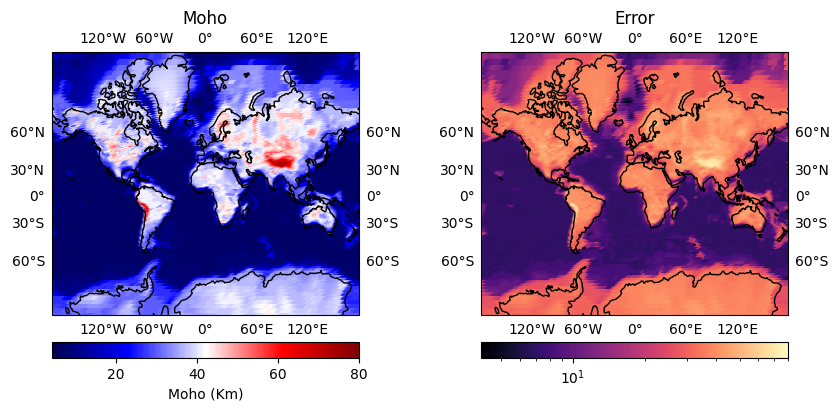

In [10]:
def plot_data(coordinates, moho, weights, title_data, title_weights):
    "Make two maps of our data, one with the data and one with the weights"
    fig, axes = plt.subplots(
        1, 2, figsize=(9.5, 7), subplot_kw=dict(projection=ccrs.Mercator())
    )
    fig.subplots_adjust(wspace=0.4)  # Increase space (default is 0.2)
    
    region = [
        data_moho.longitude.min(), data_moho.longitude.max(), 
        data_moho.latitude.min(), data_moho.latitude.max()
    ]
    
    #region = [65, 110, 5, 45]
    # Setting up the map projection
    crs = ccrs.PlateCarree()  # Using PlateCarree for the base map
    
    for ax in axes:
        ax.set_extent(region, crs=crs)  # Set region for both subplots
        ax.coastlines()  # Add coastlines
        #ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add national boundaries
        gl = ax.gridlines(draw_labels=True, crs=crs, alpha=0)
        #gl.xlabels_top = False
        #gl.ylabels_left = False
        
                               
    # Plotting the data (first subplot)
    ax = axes[0]
    ax.set_title(title_data)
    maxabs = np.nanmax(np.abs(moho))  
    minabs = np.nanmin(np.abs(moho))
    pc = ax.scatter(
        *coordinates,
        c=moho,
        s=30,
        cmap="seismic",
        vmin=minabs,
        vmax=maxabs,
        transform=crs,
    )
    plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Moho (Km)")

    # Plotting the weights (second subplot)
    ax = axes[1]
    ax.set_title(title_weights)
    pc = ax.scatter(
        *coordinates,
        c=weights,
        s=30,
        cmap="magma",
        transform=crs,
        norm=LogNorm()
    )
    plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05)
    
    plt.show()

# Assuming data_moho is a dataframe with latitude, longitude, Moho values, and weights.
plot_data(
    (data_moho.longitude, data_moho.latitude),
    data_moho.Moho,
    data_moho.Moho,  # Weights might be a different column, adjust accordingly
    "Moho",
    "Error"  # Increase space (default is 0.2)

)

# Spline Interpolation

In [17]:
data = data_eq
coordinates=(data.Long, data.Lat)
moho=data.Moho_km
data
#print (moho)

Lat    Long  Moho_km
0      36.43   94.87     49.5
1      36.43   94.87     48.0
2      36.81   92.95     49.0
3      37.02   91.74     57.0
4      32.25   91.70     74.0
...      ...     ...      ...
33854  57.18 -170.25     34.0
33855  60.14   -1.18     28.0
33856  62.07   -6.97     26.0
33857  70.99   -8.51     14.0
33858   7.27   80.70     40.0

[33859 rows x 3 columns]

# Projection, Coordinates, Region and Spacing

In [18]:
coordinates = (data.Long.values, data.Lat.values)
region = vd.get_region(coordinates)

# Use a Mercator projection for our Cartesian gridder
projection = pyproj.Proj(proj="merc", lat_ts=data.Lat.mean())
print(region)
print(coordinates)

# The output grid spacing will 6 arc-minutes. If n/60 then x arc minutes
#spacing = 6 / 60
spacing = 1

(np.float64(-179.42), np.float64(179.952), np.float64(-90.0), np.float64(82.5033))
(array([94.87, 94.87, 92.95, ..., -6.97, -8.51, 80.7 ]), array([36.43, 36.43, 36.81, ..., 62.07, 70.99,  7.27]))


### Spline weighted

In [19]:
%%time
# Your entire script here
# This spline will automatically perform cross-validation and search for the
# optimal parameter configuration.
#spline = vd.SplineCV(dampings=(1e-5, 1e-3, 1e-1)) #std = 4.6
#spline = vd.SplineCV(dampings=(1e-7, 1e-5, 1e-3, 1e-1))
spline = vd.SplineCV(dampings=(1e-5, 1e-3))
#spline = vd.Spline(damping=1e-7)

# Fit the model on the data. Under the hood, the class will perform K-fold
# cross-validation for each the 3 parameter values and pick the one with the
# highest score.
spline.fit(projection(*coordinates), data.Moho_km)

# Spline Score and Dampings: Use only when usinge SplineCV otherwise comment the Score and Damping Prints
# We can show the best R² score obtained in the cross-validation
#print("\nScore: {:.3f}".format(spline.scores_.max())) # only for SplineCV

# And then the best damping parameter that produced this high score.
#print("\nBest damping:", spline.damping_) # only for SplineCV

# Now we can create a geographic grid of air temperature by providing a
# projection function to the grid method and mask points that are too far from
# the observations
grid_full = spline.grid(
    region=region,
    spacing=spacing,
    projection=projection,
    dims=["latitude", "longitude"],
    data_names="moho",
)

grid = vd.distance_mask(
    coordinates, maxdist=3 * spacing * 111e3, grid=grid_full, projection=projection
)


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\verde\spline.py:245: FutureWarning: The mindist parameter of verde.Spline is no longer required and will be removed in Verde 2.0.0. Use the default value to obtain the future behavior.
  spline = Spline(**params)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:129: FutureWarning: The mindist parameter of verde.Spline is no longer required and will be removed in Verde 2.0.0. Use the default value to obtain the future behavior.
  new_object = klass(**new_object_params)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\verde\model_selection.py:784: FutureWarning: The default scoring will change from R² to negative root mean squared error (RMSE) in Verde 2.0.0. This may change model selection results slightly.
  score = estimator.score(*test_data)
C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:129: FutureWarning: The 

CPU times: total: 4h 56min 29s
Wall time: 23min 39s


# Parallel Processing Spline and changing Mercator projection for Global data to Equal Earth Projection

In [20]:
#data

In [21]:
#import dask.dataframe as dd

# Convert a Pandas DataFrame to a Dask DataFrame
#df_dask = dd.from_pandas(data, npartitions=4)  # Adjust partitions based on your system


In [22]:
#df_dask.head(3)

In [23]:
#df_dask.Moho_km.head(3)

In [24]:
'''
# Create the SplineCV model with parallel cross-validation
#spline = vd.SplineCV(dampings=(1e-7, 1e-5, 1e-3, 1e-1), delayed=True)
# Create the SplineCV model without delayed computations
spline = vd.SplineCV(dampings=(1e-6, 1e-4, 1e-2), delayed=True)

# Fit the model on the data
spline.fit(projection(*coordinates), data.Moho_km)

'''
# Convert Dask DataFrame to Pandas (only for necessary columns)
#df_pandas = df_dask.compute()

# Fit the model using Pandas DataFrame
#spline.fit(projection(*coordinates), df_pandas["Moho_km"])
'''

print("\nScore: {:.3f}".format(spline.scores_.max()))

# And then the best damping parameter that produced this high score.
print("\nBest damping:", spline.damping_)
# Generate the geographic grid
grid_full = spline.grid(
    region=region,
    spacing=spacing,
    projection=projection,
    dims=["latitude", "longitude"],
    data_names="moho",
)

# Apply distance mask
grid = vd.distance_mask(
    coordinates, maxdist=3 * spacing * 111e3, grid=grid_full, projection=projection
)
'''

'\n\nprint("\nScore: {:.3f}".format(spline.scores_.max()))\n\n# And then the best damping parameter that produced this high score.\nprint("\nBest damping:", spline.damping_)\n# Generate the geographic grid\ngrid_full = spline.grid(\n    region=region,\n    spacing=spacing,\n    projection=projection,\n    dims=["latitude", "longitude"],\n    data_names="moho",\n)\n\n# Apply distance mask\ngrid = vd.distance_mask(\n    coordinates, maxdist=3 * spacing * 111e3, grid=grid_full, projection=projection\n)\n'

In [25]:
spline

SplineCV(dampings=(1e-05, 0.001), mindists=[0])

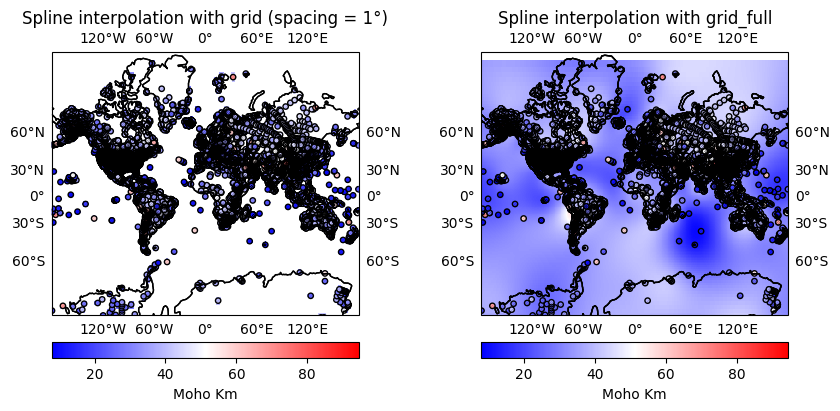

In [26]:
fig, axes = plt.subplots(
    1, 2, figsize=(9.5, 7), subplot_kw=dict(projection=ccrs.Mercator())
)
crs = ccrs.PlateCarree()
region = [
        data_moho.longitude.min(), data_moho.longitude.max(), 
        data_moho.latitude.min(), data_moho.latitude.max()
    ]
fig.subplots_adjust(wspace=0.4)  # Increase space (default is 0.2)
for ax in axes:
    ax.set_extent(region, crs=crs)  # Set region for both subplots
    ax.coastlines()  # Add coastlines
    #ax.add_feature(cfeature.BORDERS, linestyle=':')  # Add national boundaries
    gl = ax.gridlines(draw_labels=True, crs=crs, alpha=0)

# Plot Moho data in the first subplot
ax = axes[0]
ax.set_title(f"Spline interpolation with grid (spacing = {spacing}°)")
maxabs = np.nanmax(np.abs(moho))  
minabs = np.nanmin(np.abs(moho))
pc = grid.moho.plot.pcolormesh(
    ax=ax,
    cmap="bwr",
    vmin=minabs,
    vmax=maxabs,
    transform=crs,
    add_colorbar=False,
    add_labels=False,
)
plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Moho Km")
ax.plot(data.Long, data.Lat, ".k", markersize=0.1, transform=crs)
ax.coastlines()

# Add scatter plot for Moho depths
sc = ax.scatter(
    eq_info.Long,  # Ensure correct coordinate for longitude
    eq_info.Lat,   # Ensure correct coordinate for latitude
    c=eq_info.Moho_km,  # Moho depth values for coloring
    cmap='bwr',  # Color map
    s=15,  # Adjust size of the points
    edgecolors='black',  # Black edges for points
    vmin=minabs,  # Set vmin consistent with pcolormesh
    vmax=maxabs,  # Set vmax consistent with pcolormesh
    transform=crs  # Use Cartopy's coordinate system
)

# Print eq_info to check data
#print(eq_info)

# Add colorbar for the Moho depth
#cbar = plt.colorbar(sc, ax=ax, orientation="horizontal", pad=0.05)
#cbar.set_label("RF Moho Depth [Km]")

ax = axes[1]
ax.set_title("Spline interpolation with grid_full")
maxabs = np.nanmax(np.abs(moho))  
minabs = np.nanmin(np.abs(moho))
pc = grid_full.moho.plot.pcolormesh(
    ax=ax,
    cmap="bwr",
    vmin=minabs,
    vmax=maxabs,
    transform=crs,
    add_colorbar=False,
    add_labels=False,
)
plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Moho Km")
ax.plot(data.Long, data.Lat, ".k", markersize=0.1, transform=crs)
ax.coastlines()

# Add scatter plot for Moho depths
sc = ax.scatter(
    eq_info.Long,  # Ensure correct coordinate for longitude
    eq_info.Lat,   # Ensure correct coordinate for latitude
    c=eq_info.Moho_km,  # Moho depth values for coloring
    cmap='bwr',  # Color map
    s=15,  # Adjust size of the points
    edgecolors='black',  # Black edges for points
    vmin=minabs,  # Set vmin consistent with pcolormesh
    vmax=maxabs,  # Set vmax consistent with pcolormesh
    transform=crs  # Use Cartopy's coordinate system
)

#plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Km")
ax.plot(data.Long, data.Lat, ".k", markersize=0.1, transform=crs)
ax.coastlines()
plt.show()

In [27]:
t=grid.moho.as_numpy()
p=grid_full.moho.as_numpy()

In [28]:
grid
# Convert the xarray Dataset to a pandas DataFrame
grid_df = grid.to_dataframe().reset_index()
grid_full_df = grid_full.to_dataframe().reset_index()
print(len(grid_full_df))
# Save as CSV
grid_full_df.to_csv("grid_data.csv", index=False)

print("CSV file saved: grid_data.csv")

62640
CSV file saved: grid_data.csv


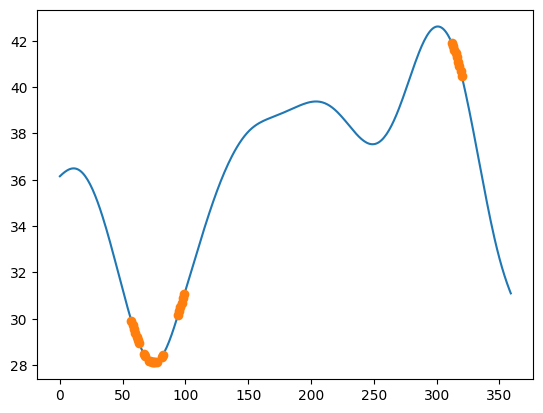

In [29]:
plt.plot(p.values[10])
plt.plot(t.values[10],'o')

# Weight Distribution

## Standard Deviation of Spline wrt RF

In [30]:
# Extract coordinates and RF Moho values
rf_lat = data_eq.Lat.values
rf_lon = data_eq.Long.values
rf_moho = data_eq.Moho_km.values

# Interpolate the spline Moho values at RF locations
spline_moho = spline.predict(projection(rf_lon, rf_lat))


# Compute the overall standard deviation (STD) of the residuals (RF Moho - Spline Moho)
overall_std = np.std(rf_moho - spline_moho)

# Compute pointwise variance (squared error) for each data point
pointwise_variance = abs((rf_moho - spline_moho)) #** 2

# Create a new DataFrame with latitude, longitude, RF Moho, Spline Moho, and pointwise variance
df = pd.DataFrame({
    "latitude": rf_lat,
    "longitude": rf_lon,
    "rf_moho": rf_moho,
    "spline_moho": spline_moho,
    "err_moho": pointwise_variance  # Variance (squared error)
})

# Print summary
print(df)
print("\nOverall STD of Spline relative to RF Moho:", overall_std)
df.to_csv("spline_data.csv", index=False)

       latitude  longitude  rf_moho  spline_moho   err_moho
0         36.43      94.87     49.5    62.995836  13.495836
1         36.43      94.87     48.0    62.995836  14.995836
2         36.81      92.95     49.0    61.643753  12.643753
3         37.02      91.74     57.0    60.837239   3.837239
4         32.25      91.70     74.0    69.048770   4.951230
...         ...        ...      ...          ...        ...
33854     57.18    -170.25     34.0    32.028367   1.971633
33855     60.14      -1.18     28.0    29.553943   1.553943
33856     62.07      -6.97     26.0    30.019198   4.019198
33857     70.99      -8.51     14.0    21.770664   7.770664
33858      7.27      80.70     40.0    37.020398   2.979602

[33859 rows x 5 columns]

Overall STD of Spline relative to RF Moho: 6.4694452296617335


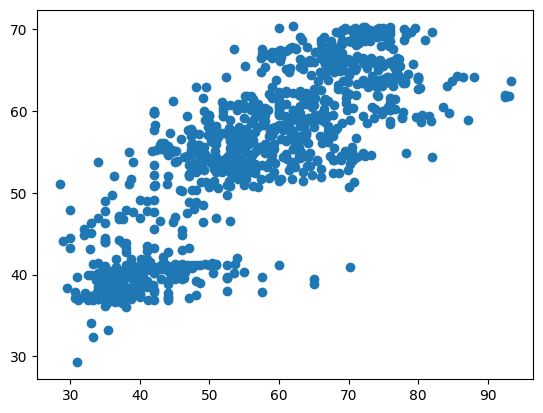

In [31]:
plt.scatter(x=data_eq['Moho_km'][0:1000],y=spline_moho[0:1000])

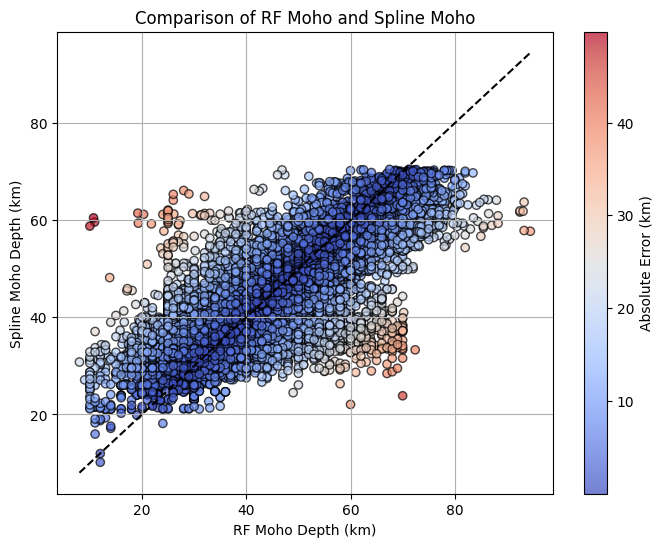

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(df["rf_moho"], df["spline_moho"], c=df["err_moho"], cmap="coolwarm", edgecolor="k", alpha=0.7)
plt.plot([df["rf_moho"].min(), df["rf_moho"].max()], [df["rf_moho"].min(), df["rf_moho"].max()], 'k--')  # 1:1 line
plt.colorbar(label="Absolute Error (km)")
plt.xlabel("RF Moho Depth (km)")
plt.ylabel("Spline Moho Depth (km)")
plt.title("Comparison of RF Moho and Spline Moho")
plt.grid(True)
plt.show()


In [33]:
data_moho.head

<bound method NDFrame.head of        longitude  latitude   Moho
0         -179.5      89.5   8.06
1         -178.5      89.5   8.08
2         -177.5      89.5   8.08
3         -176.5      89.5   8.09
4         -175.5      89.5   8.09
...          ...       ...    ...
64795      175.5     -89.5  39.00
64796      176.5     -89.5  39.00
64797      177.5     -89.5  39.00
64798      178.5     -89.5  39.00
64799      179.5     -89.5  39.00

[64800 rows x 3 columns]>

In [34]:
# Create a KDTree for RF locations
rf_tree = cKDTree(list(zip(df.longitude, df.latitude)))

# Assign RF Moho directly where RF exists (100% weight to RF)
df["weighted_moho"] = df["rf_moho"]

# Create 1°x1° bins and check which bins have no RF data
df["lat_bin"] = (df["latitude"] // 1) * 1
df["lon_bin"] = (df["longitude"] // 1) * 1

data_moho["lat_bin"] = (data_moho["latitude"] // 1) * 1
data_moho["lon_bin"] = (data_moho["longitude"] // 1) * 1

rf_bins = set(zip(df["lat_bin"], df["lon_bin"]))
all_bins = set(zip(data_moho["lat_bin"], data_moho["lon_bin"]))

# Identify bins with no RF data
missing_rf_bins = all_bins - rf_bins
df_no_rf = data_moho[data_moho[["lat_bin", "lon_bin"]].apply(tuple, axis=1).isin(missing_rf_bins)].copy()

# Assign Crust1.0 Moho first
df_no_rf["weighted_moho"] = df_no_rf["Moho"]


# Find the nearest RF node for each location without RF
_, nearest_rf_idx = rf_tree.query(list(zip(df_no_rf.longitude, df_no_rf.latitude)))

# Get **precomputed** spline_moho from the nearest RF node
df_no_rf["nearest_rf_spline_moho"] = df.spline_moho.iloc[nearest_rf_idx].values

# Predict spline Moho for each missing RF location using the global spline
df_no_rf["nearest_rf_spline_moho"] = spline.predict(
    projection(df_no_rf.longitude, df_no_rf.latitude)
)

# Compute x and y using the **precomputed nearest RF spline Moho**
x = df_no_rf["nearest_rf_spline_moho"] - df_no_rf["weighted_moho"]
y = abs(x)

# Apply updated weighting logic
df_no_rf["weighted_moho"] = np.where(
    y < overall_std,  
    df_no_rf["nearest_rf_spline_moho"],  # If error is small, use nearest RF spline Moho
    0.4 * df_no_rf["nearest_rf_spline_moho"] + 0.6 * df_no_rf["weighted_moho"]  # Otherwise, use weighted combination
)

# Combine both datasets
df_final = pd.concat([df, df_no_rf], ignore_index=True)

# Save to CSV
df_final.to_csv("weighted_moho.csv", index=False)

# Print summary
print(df_final)


       latitude  longitude  rf_moho  spline_moho   err_moho  weighted_moho  \
0         36.43      94.87     49.5    62.995836  13.495836      49.500000   
1         36.43      94.87     48.0    62.995836  14.995836      48.000000   
2         36.81      92.95     49.0    61.643753  12.643753      49.000000   
3         37.02      91.74     57.0    60.837239   3.837239      57.000000   
4         32.25      91.70     74.0    69.048770   4.951230      74.000000   
...         ...        ...      ...          ...        ...            ...   
92341    -89.50     175.50      NaN          NaN        NaN      35.096589   
92342    -89.50     176.50      NaN          NaN        NaN      35.094330   
92343    -89.50     177.50      NaN          NaN        NaN      35.091988   
92344    -89.50     178.50      NaN          NaN        NaN      35.089563   
92345    -89.50     179.50      NaN          NaN        NaN      35.087053   

       lat_bin  lon_bin  Moho  nearest_rf_spline_moho  
0      

In [35]:
df_final['weighted_moho']

0        49.500000
1        48.000000
2        49.000000
3        57.000000
4        74.000000
           ...    
92341    35.096589
92342    35.094330
92343    35.091988
92344    35.089563
92345    35.087053
Name: weighted_moho, Length: 92346, dtype: float64

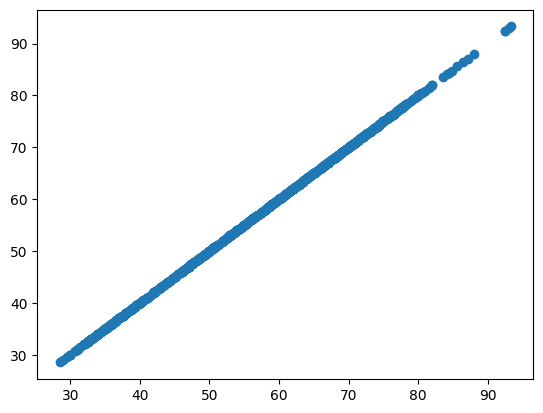

In [36]:
plt.scatter(x=data_eq['Moho_km'][0:1000],y=df_final['weighted_moho'][0:1000])

No. of times Crust1.0 falls under close proximity of RFs: 40665
10083
92346
       latitude  longitude  weighted_moho
0          89.5     -179.5      15.644503
1          89.5     -178.5      15.661076
2          89.5     -177.5      15.665586
3          89.5     -176.5      15.676034
4          89.5     -175.5      15.680422
...         ...        ...            ...
64795     -89.5      175.5      35.096589
64796     -89.5      176.5      35.094330
64797     -89.5      177.5      35.091988
64798     -89.5      178.5      35.089563
64799     -89.5      179.5      35.087053

[40665 rows x 3 columns]


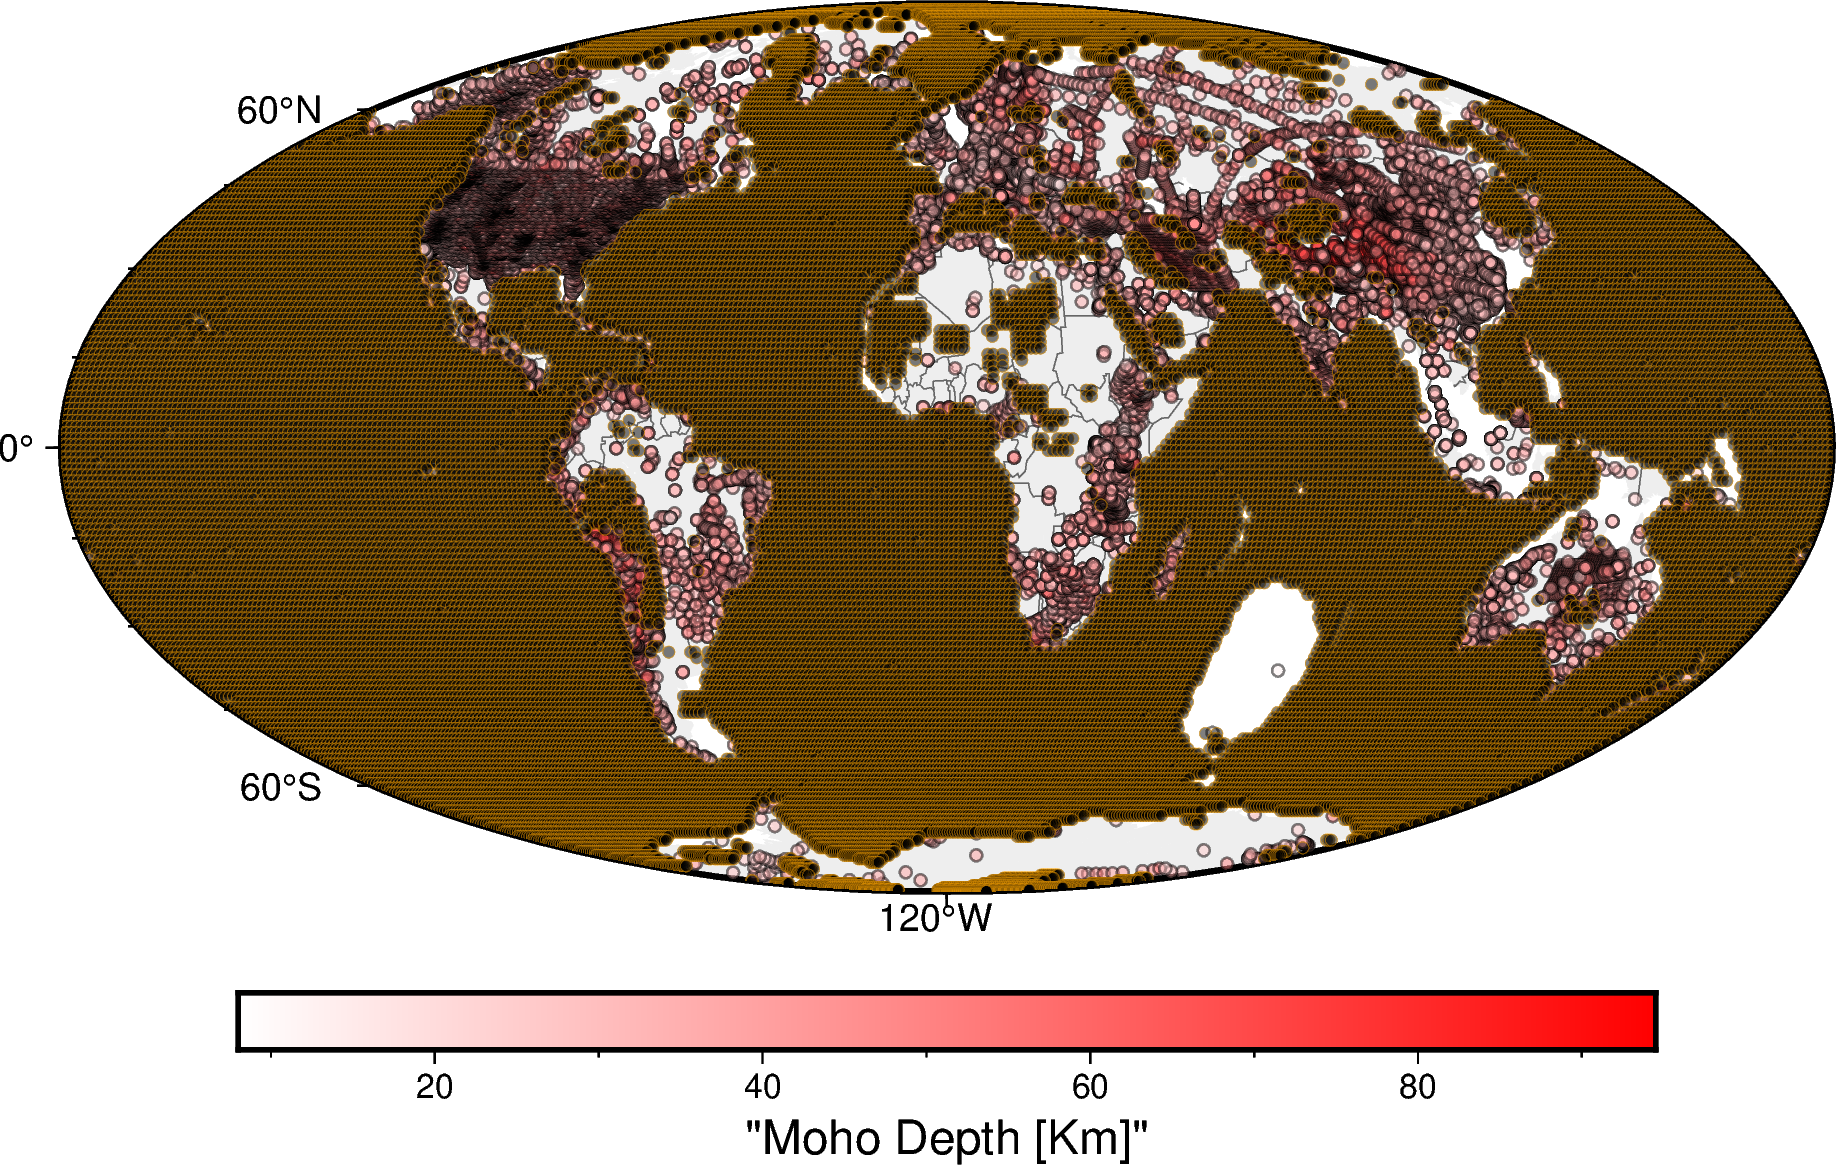

In [37]:
# Count occurrences where y < overall_std
count_close_proximity = (y > overall_std).sum()
c = (x < 0).sum()
# Print the result
print(f"No. of times Crust1.0 falls under close proximity of RFs: {count_close_proximity}")
print (c)
print(len(df_final))

# Filter the dataframe where x < 0
#df_condition = df_no_rf[x < 0][["latitude", "longitude", "weighted_moho"]]
df_condition = df_no_rf[y > overall_std][["latitude", "longitude", "weighted_moho"]]
# Display the filtered dataframe
print(df_condition)

# Start a figure
fig = pygmt.Figure()
# Add a basemap with the data region, Mercator projection, default frame
# and ticks, color in the continents, and display national borders
fig.coast(
    region=region, projection="W15c", frame="af",
    land="#eeeeee", borders="1/#666666", area_thresh=1e4,
)
# Create a colormap for the Moho Depth
pygmt.makecpt(
    cmap="polar+h",
    series=[data_eq_all.Moho_km.min(), data_eq_all.Moho_km.max()],
    #series = [data.iloc[:, 5].min(), data.iloc[:, 5].max()],
)
fig.plot(
    x=data_eq.Long,
    y=data_eq.Lat,
    fill=data_eq.Moho_km,
    style="c0.1c",
    cmap=True,
    pen="0.5p,black",transparency=50
)
# Plot colored points for the velocities
fig.plot(
    x=df_condition.longitude,
    y=df_condition.latitude,
    #fill=data_eq_all.Moho_km,
    style="c0.1c",
    cmap=True,
    pen="0.1p,orange",transparency=50
)
# Add a colorbar with automatic frame and ticks and a label
fig.colorbar(frame='af+l"Moho Depth [Km]"')
fig.show()
#fig.savefig("/home/amitava/Downloads/test.png", dpi=300)
fig.savefig(r"C:\Users\DELL\Downloads\test.png", dpi=300)

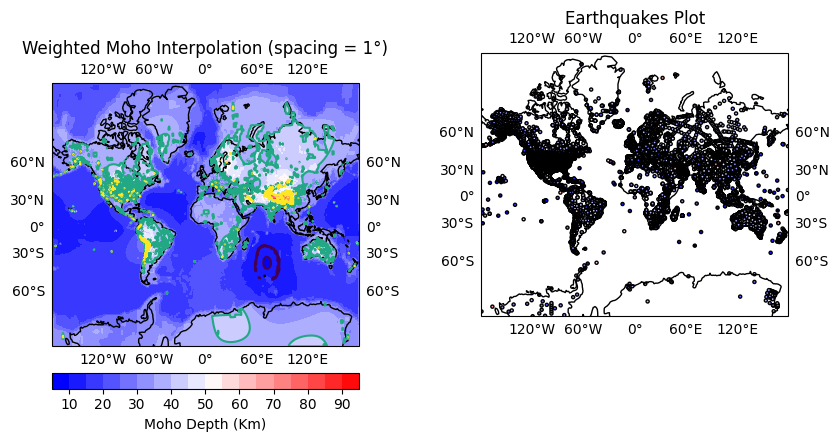

In [38]:
fig, axes = plt.subplots(
    1, 2, figsize=(9.5, 7), subplot_kw=dict(projection=ccrs.Mercator())
)
crs = ccrs.PlateCarree()
region = [
    data_moho.longitude.min(), data_moho.longitude.max(),
    data_moho.latitude.min(), data_moho.latitude.max()
]

fig.subplots_adjust(wspace=0.4)  # Increase space (default is 0.2)

for ax in axes:
    ax.set_extent(region, crs=crs)
    ax.coastlines()
    #ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True, crs=crs, alpha=0)

# -------- Subplot 1: Weighted Moho --------
ax = axes[0]
ax.set_title(f"Weighted Moho Interpolation (spacing = {spacing}°)")
maxabs = np.nanmax(np.abs(df_final.weighted_moho))
minabs = np.nanmin(np.abs(df_final.weighted_moho))

pc = ax.tricontourf(
    df_final.longitude, df_final.latitude, df_final.weighted_moho,
    #cmap="bwr", levels=100, vmin=minabs, vmax=maxabs, transform=crs
    cmap="bwr", levels=20, vmin=minabs, vmax=maxabs, transform=crs
)

pc_1 = ax.tricontour(
    df_final.longitude, df_final.latitude, df_final.weighted_moho,
    #cmap="bwr", levels=100, vmin=minabs, vmax=maxabs, transform=crs
     levels=[10,40,60],  transform=crs
)
#plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Moho Depth (Km)")
# For Weighted Moho Interpolation
cbar = plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05)
cbar.set_label("Moho Depth (Km)")
cbar.locator = MaxNLocator(integer=True)
cbar.update_ticks()

ax = axes[1]
ax.set_title("Earthquakes Plot")
# Scatter plot for RF Moho points
sc = ax.scatter(
    eq_info.Long, eq_info.Lat, c=eq_info.Moho_km,
    cmap='bwr', s=5, edgecolors='black',
    vmin=minabs, vmax=maxabs, transform=crs
)
'''
# -------- Subplot 2: Unweighted Moho (RF + Crust1.0) --------
ax = axes[1]
ax.set_title("No Spline: Only RF & Crust1.0 Moho")
maxabs_unweighted = np.nanmax(np.abs(df.rf_moho))
minabs_unweighted = np.nanmin(np.abs(df.rf_moho))

pc = ax.tricontourf(
    df.longitude, df.latitude, df.rf_moho,
    cmap="bwr", levels=100, vmin=minabs_unweighted, vmax=maxabs_unweighted, transform=crs
)

#plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05).set_label("Moho Depth (Km)")
# For Weighted Moho Interpolation
cbar = plt.colorbar(pc, ax=ax, orientation="horizontal", pad=0.05)
cbar.set_label("Moho Depth (Km)")
cbar.locator = MaxNLocator(integer=True)
cbar.update_ticks()

# Scatter plot for Crust1.0 Moho values
ax.scatter(
    data_moho.longitude, data_moho.latitude, c=data_moho.Moho,
    cmap='bwr', s=15, edgecolors='black',
    vmin=minabs_unweighted, vmax=maxabs_unweighted, transform=crs
)
'''
plt.show()
fig.savefig(r"C:/Users/DELL/Pictures/Screenshots/final_moho_depth_map.png", dpi=300)